# **zoodo food classification**

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install tensorflow-gpu==2.9


In [1]:
import requests
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2
from PIL import Image
import scipy

print ("all imported")

all imported


In [10]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())
api_url = 'https://api.calorieninjas.com/v1/nutrition?query='
query = 'french fries'
response = requests.get(api_url + query, headers={'X-Api-Key': 's9S3fiY9BWYZtpCebS71Rg==Qk1nbauJKhKE9k8R'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)


2.11.0

{"items": [{"name": "french fries", "calories": 312.5, "serving_size_g": 100.0, "fat_total_g": 14.4, "fat_saturated_g": 2.3, "protein_g": 3.4, "sodium_mg": 209, "potassium_mg": 123, "cholesterol_mg": 0, "carbohydrates_total_g": 42.1, "fiber_g": 3.8, "sugar_g": 0.3}]}


In [2]:
folder_path = r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\kaggle\input\food-101\food-101'

In [13]:
os.listdir(r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\kaggle\input\food-101\food-101\images')

['.DS_Store',
 'apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisq

In [6]:
folder_path

'D:\\Projects\\sathmika-SDGP\\foodclassification\\foodclassification\\kaggle\\input\\food-101\\food-101'

In [18]:
os.listdir(folder_path+'/meta')

['classes.txt',
 'labels.txt',
 'test.json',
 'test.txt',
 'train.json',
 'train.txt']

In [14]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3267-E0E0

 Directory of C:\xampp\htdocs\Zoodo\foodclassification

03/04/2023  11:31 PM    <DIR>          .
03/04/2023  11:31 PM    <DIR>          ..
03/04/2023  07:41 PM    <DIR>          .ipynb_checkpoints
03/04/2023  07:37 PM    <DIR>          foodclassification
03/01/2023  07:52 PM           473,603 food-image-classification-963298.ipynb
03/04/2023  07:51 PM    <DIR>          kaggle
03/04/2023  11:31 PM            69,303 multiclass-food-classification-using-tensor-935e9f.ipynb
03/01/2023  07:07 PM         4,185,003 ssd_mobilenet_v1_1_metadata_1 (1).tflite
               3 File(s)      4,727,909 bytes
               5 Dir(s)  40,695,025,664 bytes free


In [6]:
with open(r'C:\xampp\htdocs\Zoodo\foodclassification\kaggle\input\food-101\food-101\meta\train.txt') as f:
    line = f.readline()
    print(line)

apple_pie/1005649



In [5]:
#!head food-101/meta/classes.txt
with open(r'C:\xampp\htdocs\Zoodo\foodclassification\kaggle\input\food-101\food-101\meta\classes.txt') as f:
    line = f.readline()
    print(line)

apple_pie



### **Visualize random image from each of the 101 classes**

In [ ]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### **Split the image data into train and test using train.txt and test.txt**

In [19]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [17]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3267-E0E0

 Directory of C:\xampp\htdocs\Zoodo\foodclassification

03/04/2023  11:47 PM    <DIR>          .
03/04/2023  11:47 PM    <DIR>          ..
03/04/2023  07:41 PM    <DIR>          .ipynb_checkpoints
03/04/2023  07:37 PM    <DIR>          foodclassification
03/01/2023  07:52 PM           473,603 food-image-classification-963298.ipynb
03/04/2023  07:51 PM    <DIR>          kaggle
03/04/2023  11:47 PM            65,135 multiclass-food-classification-using-tensor-935e9f.ipynb
03/01/2023  07:07 PM         4,185,003 ssd_mobilenet_v1_1_metadata_1 (1).tflite
               3 File(s)      4,723,741 bytes
               5 Dir(s)  45,757,820,928 bytes free


In [20]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data(folder_path+'/meta/train.txt', folder_path+'/images', folder_path+'/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [21]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data(folder_path+'/meta/test.txt', folder_path+'/images', folder_path+'/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [4]:
cd D:\\Projects\\sathmika-SDGP\\foodclassification\\foodclassification\\kaggle\\input\\food-101\\food-101

D:\Projects\sathmika-SDGP\foodclassification\foodclassification\kaggle\input\food-101\food-101


In [11]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!dir /a /b /s train | find /v /c ""

Total number of samples in train folder
24783


In [12]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!dir /b /s test | find /v /c ""

Total number of samples in test folder
8283


### **Fine tune vgg-16 Pretrained model using Food 101 dataset**

In [8]:
# folder path
path = r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\kaggle\input\food-101\food-101\test'
folders = 0

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    folders += len(dirnames)

print (folders)
num_of_classes=folders

34


In [4]:
!pip install tensorflow_gpu==2.10

  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Training the model

In [3]:
# Clearing previous session
K.clear_session()

# Setting number of classes, image dimensions and other parameters
n_classes = 33
img_width, img_height = 299, 299
train_data_dir = r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\kaggle\input\food-101\food-101\train'
validation_data_dir = r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\kaggle\input\food-101\food-101\test'
nb_train_samples = 24750
nb_validation_samples = 8250
batch_size = 16

# Defining image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Loading the VGG16 model without the top layer and adding custom layers
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# Adding the output layer with softmax activation
predictions = Dense(n_classes, activation='softmax')(x)

# Compiling the model with SGD optimizer and categorical crossentropy loss
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Defining callbacks
checkpointer = ModelCheckpoint(filepath=r'D:Projects\sathmika-SDGP\foodclassification\foodclassification\zodoofoodclassification_model.h5', verbose=1, save_best_only=True)
csv_logger = CSVLogger(r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\history_3class.log')

# Training the model
history = model.fit(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=25,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

# Saving the model
model.save(r'D:\Projects\sathmika-SDGP\foodclassification\foodclassification\zodoofoodclassification_model.h5')


Found 24750 images belonging to 33 classes.
Found 8250 images belonging to 33 classes.
Epoch 1/25
1546/1546 [==============================] - ETA: 0s - loss: 2.2003 - accuracy: 0.4050
Epoch 1: val_loss improved from inf to 1.10222, saving model to D:Projects\sathmika-SDGP\foodclassification\foodclassification\zodoofoodclassification_model.hdf5
1546/1546 [==============================] - 714s 453ms/step - loss: 2.2003 - accuracy: 0.4050 - val_loss: 1.1022 - val_accuracy: 0.6932
Epoch 2/25
1546/1546 [==============================] - ETA: 0s - loss: 1.2176 - accuracy: 0.6740
Epoch 2: val_loss improved from 1.10222 to 0.85696, saving model to D:Projects\sathmika-SDGP\foodclassification\foodclassification\zodoofoodclassification_model.hdf5
1546/1546 [==============================] - 285s 184ms/step - loss: 1.2176 - accuracy: 0.6740 - val_loss: 0.8570 - val_accuracy: 0.7629
Epoch 3/25
1546/1546 [==============================] - ETA: 0s - loss: 0.9588 - accuracy: 0.7411
Epoch 3: val_loss

In [31]:
!pip install --upgrade tensorflow keras numpy pandas sklearn pillow


  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2366 sha256=43044aba8f15ab195b00259e2484573811ea7142605212b788f090a005a4455d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
class_map_3 = train_generator.class_indices
class_map_3

### **Visualize the accuracy and loss plots**

In [ ]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


In [ ]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

### **Testing**

In [3]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model(r'C:\xampp\htdocs\Zoodo\zoodofoodclassification\zodoofoodclassification_model.hdf5',compile = False)

CPU times: total: 4.73 s
Wall time: 4.24 s


In [17]:
food_list = sorted(os.listdir(r'C:\xampp\htdocs\Zoodo\images'))

In [18]:
del food_list[0]

In [19]:
food_list

['apple_pie',
 'cheesecake',
 'chicken_curry',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'club_sandwich',
 'donuts',
 'fish_and_chips',
 'french_fries',
 'french_toast',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'greek_salad',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'lasagna',
 'macaroni_and_cheese',
 'omelette',
 'pancakes',
 'pizza',
 'ramen',
 'samosa',
 'shrimp_and_grits',
 'spaghetti_carbonara',
 'spring_rolls',
 'steak',
 'strawberry_shortcake',
 'sushi',
 'tacos',
 'waffles']

In [7]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()
        print(pred_value)
        
    api_url = 'https://api.calorieninjas.com/v1/nutrition?query='
    query = pred_value.replace("_"," ")
    response = requests.get(api_url + query, headers={'X-Api-Key': 's9S3fiY9BWYZtpCebS71Rg==Qk1nbauJKhKE9k8R'})
    if response.status_code == requests.codes.ok:
        print(response.text)
    else:
        print("Error:", response.status_code, response.text)
        
    

1/1 [==============================] - 0s 205ms/step


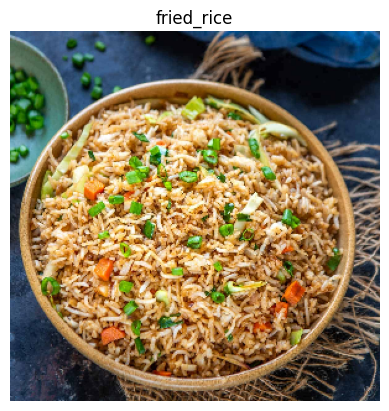

fried_rice
{"items": [{"name": "fried rice", "calories": 174.5, "serving_size_g": 100.0, "fat_total_g": 2.9, "fat_saturated_g": 0.5, "protein_g": 4.0, "sodium_mg": 393, "potassium_mg": 50, "cholesterol_mg": 17, "carbohydrates_total_g": 32.4, "fiber_g": 1.1, "sugar_g": 0.6}]}


In [20]:
# Make a list of downloaded images and test the trained model
images = []
images.append(r'C:\xampp\htdocs\Zoodo\zoodofoodclassification\testimage1.jpg')
predict_class(model_best, images, True)

### **Model Explainability**

In [ ]:
# Load the saved model trained with 3 classes
K.clear_session()
print("Loading the model..")
model = load_model('best_model_3class.hdf5',compile = False)
print("Done!")


* **Summary of the model gives us the list of all the layers in the network along with other useful details**

In [ ]:
model.summary()

* **Defining some helper functions**

In [ ]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)
    

In [ ]:
def show_activations(activations, layer_names):
    
    images_per_row = 16

    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names, activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()



In [ ]:
len(model.layers)

In [ ]:
# We start with index 1 instead of 0, as input layer is at index 0
layers = [layer.output for layer in model.layers[1:11]]
# We now initialize a model which takes an input and outputs the above chosen layers
activations_output = models.Model(inputs=model.input, outputs=layers)

**As seen below, the 10 chosen layers contain 3 convolution, 3 batch normalization, 3 activation and 1 max pooling layers**

In [ ]:
layers

**Get the names of all the selected layers**

In [ ]:
layer_names = []
for layer in model.layers[1:11]:
    layer_names.append(layer.name)
print(layer_names)

**Provide an input to the model and get the activations of all the 10 chosen layers**

In [ ]:
food = 'applepie.jpg'
activations = get_activations(food,activations_output)

* **activations** contain the outputs of all the 10 layers which can be plotted and visualized

**Visualize the activations of intermediate layers from layer 1 to 10**

In [ ]:
show_activations(activations, layer_names)

**Get the activations for a different input / food**

In [ ]:
food = 'pizza.jpg'
activations = get_activations(food,activations_output)

In [ ]:
show_activations(activations, layer_names)

### **Look into the sparse activations in the layer activation_1**

In [ ]:
# Get the index of activation_1 layer which has sparse activations
ind = layer_names.index('activation_1')
sparse_activation = activations[ind]
a = sparse_activation[0, :, :, 13]
a

In [ ]:
all (np.isnan(a[j][k])  for j in range(a.shape[0]) for k in range(a.shape[1]))

In [ ]:
# Get the index of batch_normalization_1 layer which has sparse activations
ind = layer_names.index('batch_normalization_1')
sparse_activation = activations[ind]
b = sparse_activation[0, :, :, 13]
b

**Show the activation outputs of 1st, 2nd and 3rd Conv2D layer activations to compare how layers get abstract with depth**

In [ ]:
first_convlayer_activation = activations[0]
second_convlayer_activation = activations[3]
third_convlayer_activation = activations[6]
f,ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(first_convlayer_activation[0, :, :, 3], cmap='viridis')
ax[0].axis('OFF')
ax[0].set_title('Conv2d_1')
ax[1].imshow(second_convlayer_activation[0, :, :, 3], cmap='viridis')
ax[1].axis('OFF')
ax[1].set_title('Conv2d_2')
ax[2].imshow(third_convlayer_activation[0, :, :, 3], cmap='viridis')
ax[2].axis('OFF')
ax[2].set_title('Conv2d_3')


In [ ]:
def get_attribution(food):
    img = image.load_img(food, target_size=(299, 299))
    img = image.img_to_array(img) 
    img /= 255. 
    f,ax = plt.subplots(1,3, figsize=(15,15))
    ax[0].imshow(img)
    
    img = np.expand_dims(img, axis=0) 
    
    preds = model.predict(img)
    class_id = np.argmax(preds[0])
    ax[0].set_title("Input Image")
    class_output = model.output[:, class_id]
    last_conv_layer = model.get_layer("mixed10")
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])
    for i in range(2048):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    ax[1].imshow(heatmap)
    ax[1].set_title("Heat map")
    
    
    act_img = cv2.imread(food)
    heatmap = cv2.resize(heatmap, (act_img.shape[1], act_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(act_img, 0.6, heatmap, 0.4, 0)
    cv2.imwrite('classactivation.png', superimposed)
    img_act = image.load_img('classactivation.png', target_size=(299, 299))
    ax[2].imshow(img_act)
    ax[2].set_title("Class Activation")
    plt.show()
    return preds

In [ ]:
print("Showing the class map..")
print(class_map_3)

In [ ]:
pred = get_attribution('applepie.jpg')
print("Here are softmax predictions..",pred)

###  **See how the class activation map looks for a different image**

In [ ]:
pred = get_attribution('pizza.jpg')
print("Here are softmax predictions..",pred)

### **Lets see if we can break the model or see what it does when we surpise it with different data!**

In [ ]:
!wget -O piepizza.jpg https://raw.githubusercontent.com/theimgclist/PracticeGround/master/Food101/piepizza.jpg
!wget -O piepizzas.png https://raw.githubusercontent.com/theimgclist/PracticeGround/master/Food101/piepizzas.png
!wget -O pizzapie.jpg https://raw.githubusercontent.com/theimgclist/PracticeGround/master/Food101/pizzapie.jpg
!wget -O pizzapies.png https://raw.githubusercontent.com/theimgclist/PracticeGround/master/Food101/pizzapies.png    

In [ ]:
food = 'piepizza.jpg'
activations = get_activations(food,activations_output)

In [ ]:
show_activations(activations, layer_names)

In [ ]:
pred = get_attribution('piepizza.jpg')
print("Here are softmax predictions..",pred)

In [ ]:
food = 'pizzapie.jpg'
activations = get_activations(food,activations_output)

In [ ]:
pred = get_attribution('pizzapie.jpg')
print("Here are softmax predictions..",pred)

### **More surprise data to the model...**

In [ ]:
food = 'pizzapies.png'
activations = get_activations(food,activations_output)

In [ ]:
pred = get_attribution('pizzapies.png')
print("Here are softmax predictions..",pred)

In [ ]:
food = 'piepizzas.png'
activations = get_activations(food,activations_output)

In [ ]:
pred = get_attribution('piepizzas.png')
print("Here are softmax predictions..",pred)